# La régression logistique

## Pourquoi la régression logistique ?

La régression logistique est un __modèle linéaire généralisé__ qui permet de répondre au cas où la variable dépendante (celle qu'on cherche à expliquer) est qualitative. Les variables explicatives (ou indépendantes) peuvent être quantitative ou qualitative.  
Il existe trois types de régressions logistiques :
- la régression logistique ordinaire ou régression logistique binaire lorsque la variable d’intérêt est binaire (oui/non, vrai/faux)
- la régression logistique multinomiale qui est une extension aux variables qualitatives à trois modalités ou plus
- la régression logistique ordinale qui correspond au cas où la variable qualitative au moins 3 modalités ordonnées hiérarchiquement

Exemples de problèmes :
- déterminer si un objet est défectueux en fonction par exemple du matériau utilisé, de la température de fabrication, de l'humidité, etc...
- déterminer si un client a cliqué sur l'offre promotionnelle contenue dans un email selon différentes caractéristiques individuelles (âge, sexe, urbain/rural, etc...).Plus généralement les problèmes de segmentation de clients
- déterminer si un email est un SPAM ou non
- en médicine : déterminer si une tumeur est maligne/bénine, si un médicament permet la guérison ou non, etc...

$\Rightarrow$ ce sont des problèmes de __classification__

## Intuition de la régression logistique

### Importer et afficher les données email_offer.csv

In [1]:
import pandas as pd
data = pd.read_csv('Data/email_offer.csv')
data

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0
...,...,...,...
95,31,Male,0
96,49,Male,1
97,36,Male,0
98,32,Female,0


### Tracer le scatter plot de y (TookAction) en fonction de x (Age)

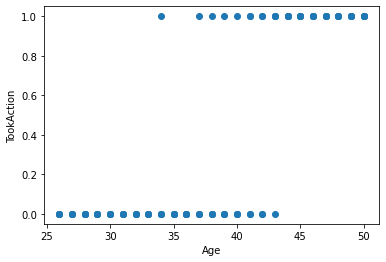

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data['Age'], data['TookAction'])
ax.set_xlabel('Age')
ax.set_ylabel('TookAction')
plt.show()

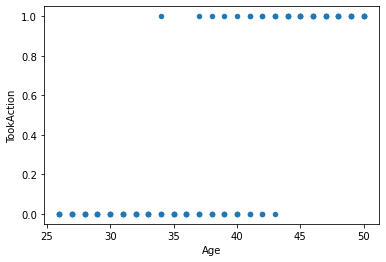

In [5]:
# ou autrement: la méthode plot des dataframe
data.plot(x='Age', y='TookAction', kind='scatter');

### Entrainer un modèle de régression linéaire et afficher la droite de régression sur le scatter plot

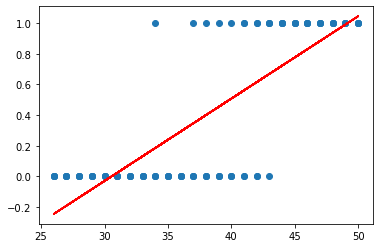

In [32]:
# Les données
x=data[['Age']]
y=data[['TookAction']]

# Le modèle
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x,y)

# Visualisation
plt.scatter(x,y)
plt.plot(x, reglin.predict(x), c='r')
plt.show()

### Coder la fonction sigmoïde et afficher son graphe

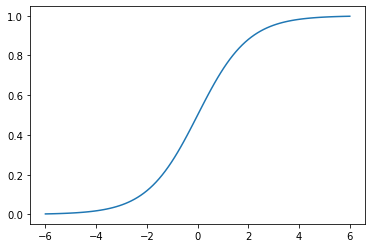

In [18]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_values = np.linspace(-6, 6, 100)

plt.plot(x_values, sigmoid(x_values));

## Une première régression logistique

### Construire un premier modèle de régression logistique avec uniquement l'âge comme variable explicative

In [42]:
# Les données
x=data[['Age']]
y=data['TookAction']

# Modèle de régression logistique
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()
reglog.fit(x,y)

# Prédictions
y_pred = reglog.predict(x)
prob_pred = reglog.predict_proba(x)

### Afficher sur un même graphique, le scatter plot, la droite de régression et les probabilités

In [49]:
x.sort_values(by='Age')

,Age
49,26
74,26
91,26
51,26
24,27
...,...
85,49
14,50
39,50
26,50


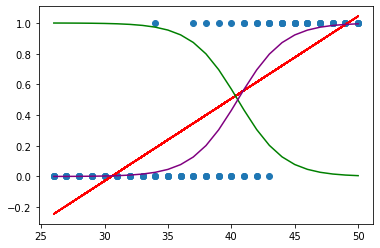

In [53]:
plt.scatter(x,y)
plt.plot(x, reglin.predict(x),c='r')
plt.plot(x.sort_values(by='Age'), reglog.predict_proba(x.sort_values(by='Age'))[:,0], c='g')
plt.plot(x.sort_values(by='Age'), reglog.predict_proba(x.sort_values(by='Age'))[:,1], c='purple');

### Construire un second modèle de régression logistique avec cette fois l'âge et le genre comme variables explicatives et visualiser sur les résultats sur le même graphique que précédemment

## Évaluation du modèle

### Matrice de confusion

### Affichage des probabilités

### Courbe ROC et AUC

## Interprétation des coefficients